# Import required libraries

In [20]:
!pip install geopandas

In [21]:
!pip install geopandas matplotlib requests

In [22]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

# Live Earthquake Data (Past Day)

In [24]:
url="https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"

In [25]:
earthquake_gpd=gpd.read_file(url)

In [70]:
earthquake_gpd.head(10)

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,nc75316212,0.76,"6 km WNW of Cobb, CA",1771572178550,1771572275473,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",nc,",",nearby-cities,origin,phase-data,",11,0.004846,0.01,73.0,md,earthquake,"M 0.8 - 6 km WNW of Cobb, CA",POINT Z (-122.78667 38.8345 1.91)
1,nc75316207,0.93,"7 km NW of The Geysers, CA",1771571971650,1771572065316,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",nc,",",nearby-cities,origin,phase-data,",10,0.018490,0.02,69.0,md,earthquake,"M 0.9 - 7 km NW of The Geysers, CA",POINT Z (-122.80883 38.82317 2.49)
2,tx2026doichu,1.30,"8 km SSE of Coahoma, Texas",1771570549083,1771570758490,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",tx,",",origin,phase-data,",15,0.100000,0.30,61.0,ml,earthquake,"M 1.3 - 8 km SSE of Coahoma, Texas",POINT Z (-101.287 32.219 3.8333)
3,nc75316197,0.99,"8 km W of Cobb, CA",1771569658450,1771569997668,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,0.0,...,",nc,",",dyfi,nearby-cities,origin,phase-data,",9,0.020210,0.01,231.0,md,earthquake,"M 1.0 - 8 km W of Cobb, CA",POINT Z (-122.81233 38.83283 2.02)
4,aka2026dohgrd,2.60,"4 km ENE of Anchor Point, Alaska",1771569041162,1771569319790,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ak,",",origin,phase-data,",71,0.200000,0.70,62.0,ml,earthquake,"M 2.6 - 4 km ENE of Anchor Point, Alaska",POINT Z (-151.764 59.796 59.5)
5,hv74903641,1.64,"29 km ENE of Honaunau-Napoopoo, Hawaii",1771568673330,1771570297290,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",hv,",",origin,phase-data,",28,0.025150,0.14,145.0,ml,earthquake,"M 1.6 - 29 km ENE of Honaunau-Napoopoo, Hawaii",POINT Z (-155.59817 19.5505 5.62)
6,hv74903626,0.77,"29 km ENE of Honaunau-Napoopoo, Hawaii",1771568604840,1771572040100,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",hv,",",origin,phase-data,",12,0.025130,0.12,161.0,md,earthquake,"M 0.8 - 29 km ENE of Honaunau-Napoopoo, Hawaii",POINT Z (-155.60033 19.547 6.36)
7,hv74903621,0.79,"30 km ENE of Honaunau-Napoopoo, Hawaii",1771568525130,1771571889300,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",hv,",",origin,phase-data,",13,0.018660,0.10,153.0,md,earthquake,"M 0.8 - 30 km ENE of Honaunau-Napoopoo, Hawaii",POINT Z (-155.59417 19.54417 7.27)
8,hv74903616,0.89,"30 km ENE of Honaunau-Napoopoo, Hawaii",1771568417410,1771571708920,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",hv,",",origin,phase-data,",13,0.024400,0.10,120.0,md,earthquake,"M 0.9 - 30 km ENE of Honaunau-Napoopoo, Hawaii",POINT Z (-155.59367 19.55417 7.77)
9,hv74903611,2.92,"27 km ENE of Honaunau-Napoopoo, Hawaii",1771568134820,1771568448880,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",hv,",",origin,phase-data,",53,0.031000,0.28,56.0,md,earthquake,"M 2.9 - 27 km ENE of Honaunau-Napoopoo, Hawaii",POINT Z (-155.61533 19.526 6.11)


<Axes: >

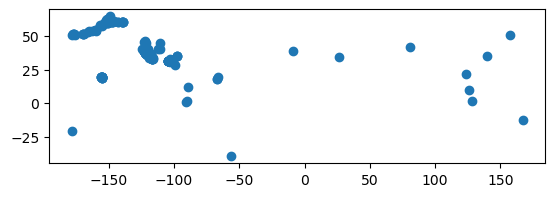

In [37]:
earthquake_gpd.plot()

In [38]:
earthquake_gpd.columns

Index(['id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'geometry'],
      dtype='object')

# Filter earthquakes with magnitude > 4

In [83]:
gdf_filtered = earthquake_gpd[earthquake_gpd["mag"] > 2]

<Axes: >

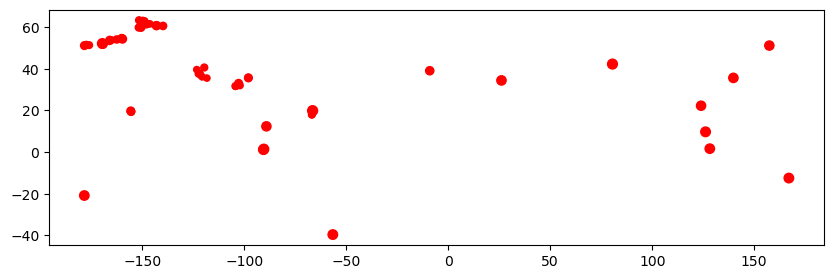

In [84]:
# Plot map
gdf_filtered.plot(
    figsize=(10,6),
    markersize=gdf_filtered["mag"] * 10,
    color="red"
)

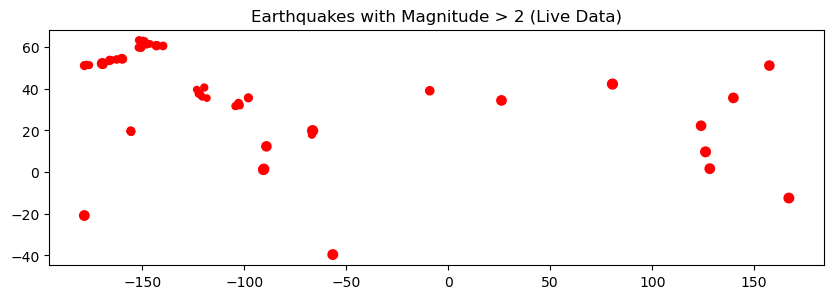

In [85]:
fig, ax = plt.subplots(figsize=(10,6))

gdf_filtered.plot(
    ax=ax,
    markersize=gdf_filtered["mag"] * 10,
    color="red"
)

ax.set_title("Earthquakes with Magnitude > 2 (Live Data)")
plt.show()

# Load world map from Natural Earth (direct URL)

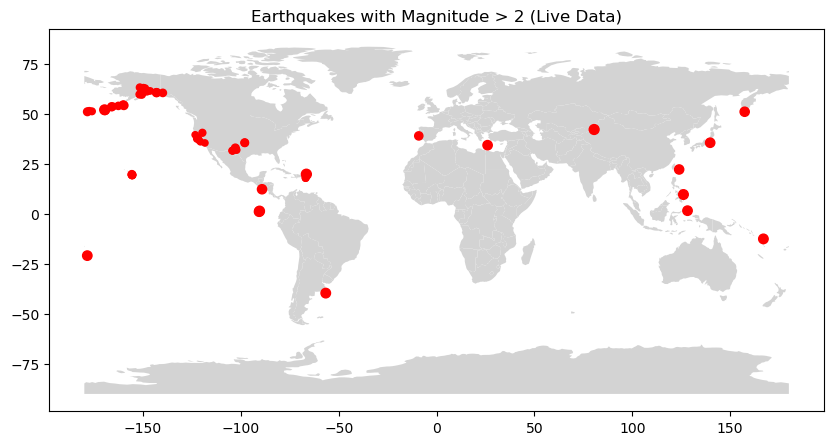

In [86]:

world = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
)

# Plot world
fig, ax = plt.subplots(figsize=(10,6))
world.plot(ax=ax, color="lightgray")

# Plot earthquakes on top
gdf_filtered.plot(
    ax=ax,
    markersize=gdf_filtered["mag"] * 10,
    color="red"
)

ax.set_title("Earthquakes with Magnitude > 2 (Live Data)")
plt.show()

## Top 5 Strongest Earthquakes

In [87]:
#Top 5 Strongest Earthquakes
top5 = gdf_filtered.sort_values(by="mag", ascending=False).head(5)
print(top5[["mag", "place"]])

     mag                              place
133  5.1   155 km N of Arecibo, Puerto Rico
189  5.0            118 km N of Aksu, China
100  4.9  240 km N of Puerto Ayora, Ecuador
126  4.8     5 km SSE of Union, Philippines
128  4.8     107 km SSW of Nikolski, Alaska


In [88]:
gdf_filtered["time"]

4      1771569041162
9      1771568134820
11     1771567909040
14     1771565748700
21     1771563048904
           ...      
197    1771489972786
200    1771489479959
203    1771488892650
209    1771486949611
212    1771486201762
Name: time, Length: 62, dtype: int64

## Counts how many earthquakes happened in each hour.

In [89]:
import pandas as pd

gdf_filtered["time"] = pd.to_datetime(gdf_filtered["time"], unit="ms")
gdf_filtered["hour"] = gdf_filtered["time"].dt.hour

C:\python312\Lib\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\python312\Lib\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [90]:
print(gdf_filtered["hour"].value_counts().sort_index())

hour
0     1
2     2
3     1
4     2
5     1
6     3
7     2
8     7
9     4
10    3
11    4
12    3
13    4
14    5
15    2
16    1
17    5
18    3
19    4
20    2
21    1
22    1
23    1
Name: count, dtype: int64


## Counts how many earthquakes happened in each country.

In [92]:
world = gpd.read_file(
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
)

gdf_filtered = gdf_filtered.to_crs("EPSG:4326")
world = world.to_crs("EPSG:4326")

joined = gpd.sjoin(gdf_filtered, world, how="left", predicate="within")

# Get country names (not place)
print(joined["ADMIN"].value_counts().head(10))

ADMIN
United States of America    30
Puerto Rico                  2
Portugal                     1
Canada                       1
China                        1
Japan                        1
Name: count, dtype: int64
